In [2]:
from time import time

import numpy as np

from numpy import array, dot, exp, sqrt
from numpy.random import rand, seed
from scipy.spatial.distance import pdist, squareform
from scipy.spatial import distance

import matplotlib.pyplot as plt
import matplotlib

import pandas as pd

def draw_state(mLocs, mState, caption):
    # add figure
    matplotlib.rcParams.update({'font.size': 16})
    fig = plt.figure(figsize=(14, 14))
    ax = fig.add_subplot(111)

    panels = mLocs[mState == 1]
    empty = mLocs[mState == 0]
    new = mLocs[mState == 2]

    ax.scatter(empty[:,0], empty[:,1], color='red', s=2, alpha=0.1)
    ax.scatter(panels[:,0], panels[:,1], color='green', s=2, alpha=0.3)
    ax.scatter(new[:,0], new[:,1], color='blue', s=2, alpha=0.4)
    plt.title(caption, size=22)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

In [152]:
import os 

script_dir = os.path.dirname(os.path.realpath('__file__'))
fn_locs = "locs.csv"
fn_state = "state_iter_17.csv"

DIR = "../data/sim100k/history-sparse/1overr2/"
f_locs = os.path.abspath(os.path.realpath(os.path.join(script_dir, f"{DIR}{fn_locs}")))
locs = np.loadtxt(f_locs)
f_state = os.path.abspath(os.path.realpath(os.path.join(script_dir, f"{DIR}{fn_state}")))
state = np.loadtxt(f_state)
#draw_state(locs, state, "State with N=500k")

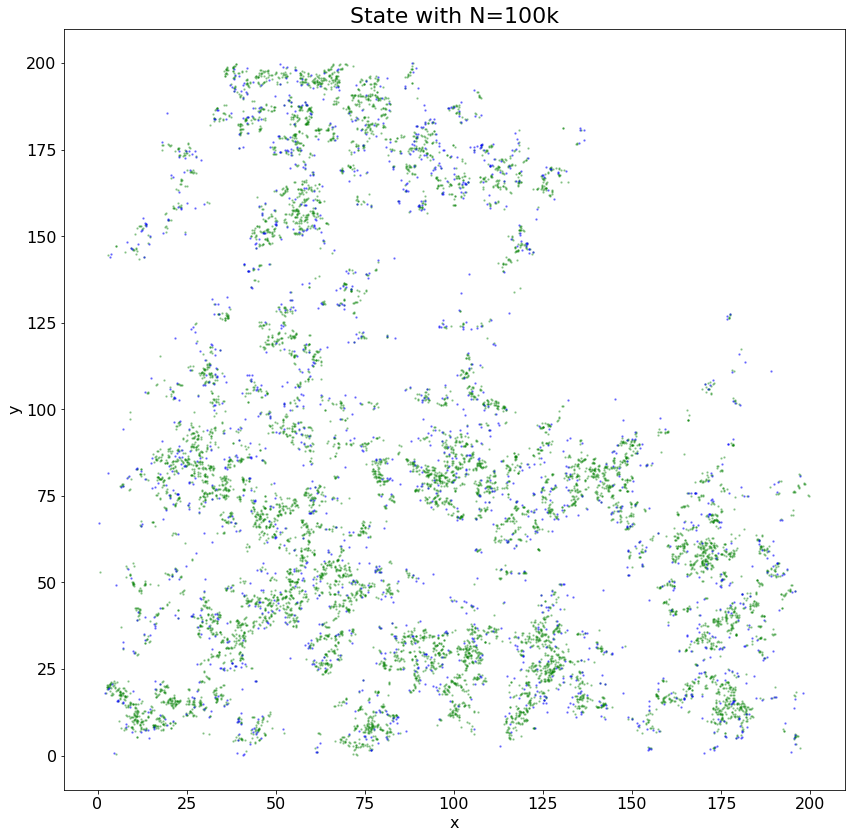

In [153]:
draw_state(locs[state != 0], state[state != 0], "State with N=100k")

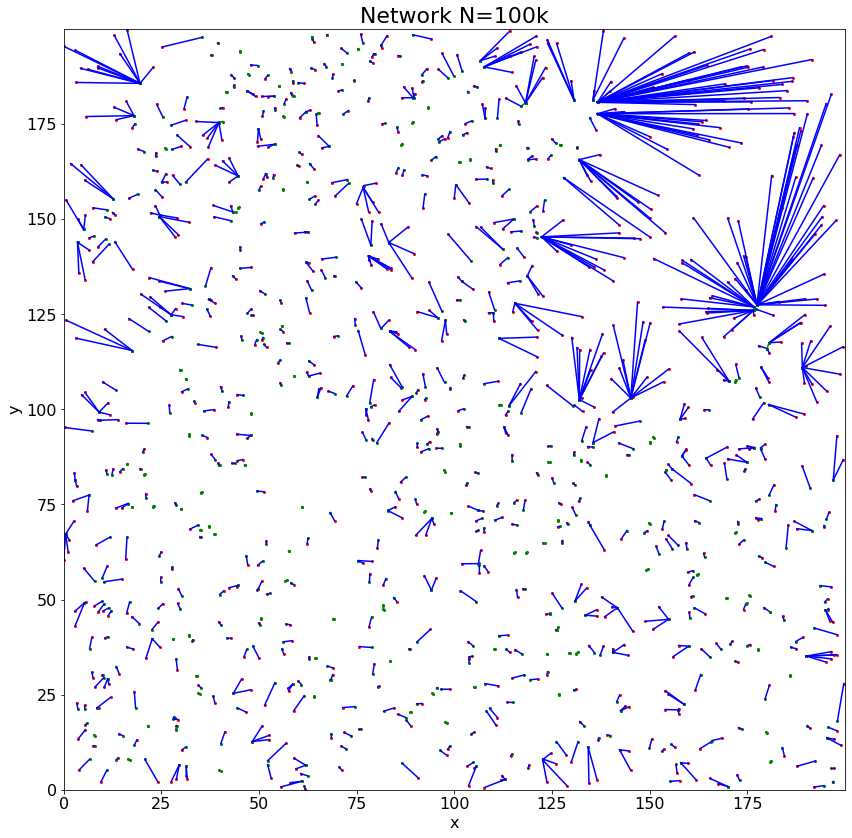

In [154]:
def draw_network(mLocs, mState, n_lim, caption):
    # add figure
    matplotlib.rcParams.update({'font.size': 16})
    fig = plt.figure(figsize=(14, 14))
    ax = fig.add_subplot(111)
    ax.set_xlim([0, np.max(mLocs)])
    ax.set_ylim([0, np.max(mLocs)])

    panels = mLocs[mState == 1]
    empty = mLocs[mState == 0]
    new = mLocs[mState == 2]
    
    for _state, point in zip(mState, mLocs[:n_lim]):
        cell_locs = mLocs[state != 0]
        cell_locs = cell_locs[cell_locs != point]
        cell_locs = cell_locs.reshape((int(cell_locs.size / 2), 2))
        i = np.argmin(distance.cdist([point], cell_locs))
        x = [point[0], cell_locs[i][0]]
        y = [point[1], cell_locs[i][1]]
        
        fmt =  'g-' if _state != 0 else 'b-'
        cl = 'g' if _state != 0 else 'r'
        ax.scatter(point[0], point[1], s=4, c=cl)
        ax.scatter(cell_locs[i][0], cell_locs[i][1], s=4, c='g')
        #ax.plot(cell_locs[i], 'g')
        ax.plot(x, y, fmt)

    #ax.scatter(empty[:,0], empty[:,1], color='red', s=2, alpha=0.1)
    #ax.scatter(panels[:,0], panels[:,1], color='green', s=2, alpha=0.3)
    #ax.scatter(new[:,0], new[:,1], color='blue', s=2, alpha=0.4)
    plt.title(caption, size=22)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()
    
n_lim = 1000
draw_network(locs, state, n_lim, 'Network N=100k')

In [155]:
def calc_network(mLocs, mState, n_lim, caption):
    panels = mLocs[mState == 1]
    empty = mLocs[mState == 0]
    new = mLocs[mState == 2]
    d = np.array([])
    for point in mLocs[:n_lim]:
        cell_locs = mLocs[state != 0]
        cell_locs = cell_locs[cell_locs != point]
        cell_locs = cell_locs.reshape((int(cell_locs.size / 2), 2))
        cells = state[state != 0]
        d = np.append(d, np.min(distance.cdist([point], cell_locs)))
        
    return d
n_lim = 20000
eps0 = calc_network(locs, state, n_lim, '')

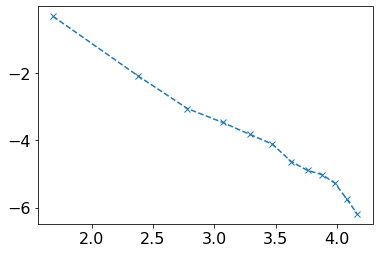

In [158]:
H, limits = np.histogramdd(eps0, bins=12)
plt.plot(np.log(limits[0][1:]), np.log(H / n_lim), 'x--')

In [50]:
np.exp(-4.0)

0.01831563888873418

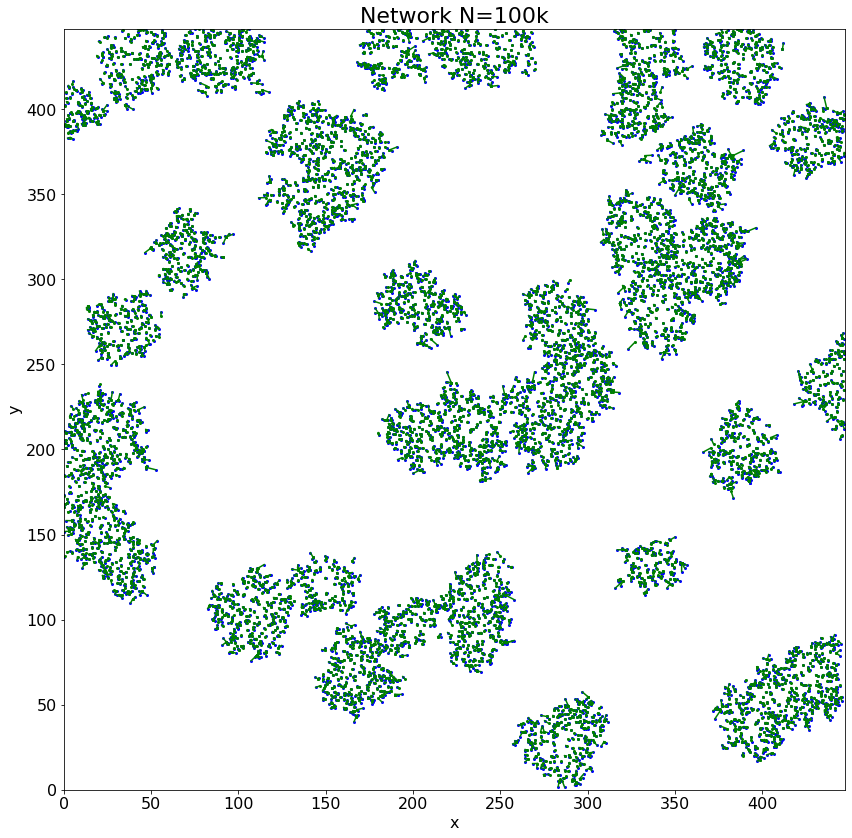

In [114]:
def draw_network(mLocs, mState, n_lim, caption):
    # add figure
    matplotlib.rcParams.update({'font.size': 16})
    fig = plt.figure(figsize=(14, 14))
    ax = fig.add_subplot(111)
    ax.set_xlim([0, np.max(mLocs)])
    ax.set_ylim([0, np.max(mLocs)])

    panels = mLocs[mState == 1]
    empty = mLocs[mState == 0]
    new = mLocs[mState == 2]
    
    for point in new:
        i = np.argmin(distance.cdist([point], panels))
        x = [point[0], panels[i][0]]
        y = [point[1], panels[i][1]]
        
        fmt = 'g-'
        cl = 'b'
        ax.scatter(point[0], point[1], s=4, c=cl)
        ax.scatter(panels[i][0], panels[i][1], s=4, c='g')
        #ax.plot(cell_locs[i], 'g')
        ax.plot(x, y, fmt)

    #ax.scatter(empty[:,0], empty[:,1], color='red', s=2, alpha=0.1)
    #ax.scatter(panels[:,0], panels[:,1], color='green', s=2, alpha=0.3)
    #ax.scatter(new[:,0], new[:,1], color='blue', s=2, alpha=0.4)
    plt.title(caption, size=22)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()
    
n = 1000
draw_network(locs, state, n, 'Network N=100k')

In [126]:
# Check if the probabilty used for the population process
# can be reproduced from the final state
import os 

script_dir = os.path.dirname(os.path.realpath('__file__'))
fn_locs = "locs.csv"
fn_state = "state_iter_15.csv"

DIR = "../data/sim500k/history-sparse/exp/"
f_locs = os.path.abspath(os.path.realpath(os.path.join(script_dir, f"{DIR}{fn_locs}")))
locs = np.loadtxt(f_locs)
f_state = os.path.abspath(os.path.realpath(os.path.join(script_dir, f"{DIR}{fn_state}")))
state = np.loadtxt(f_state)

def calc_network(mLocs, mState, n_lim, caption):
    panels = mLocs[mState == 1]
    empty = mLocs[mState == 0]
    new = mLocs[mState == 2]
    d = np.array([])
    for point in new:
        d = np.append(d, np.min(distance.cdist([point], panels)))
    
    n = np.copy(d)
    H, limits = np.histogramdd(d, bins=10)
    print(limits)
    
    for point in empty:
        d = np.append(d, np.min(distance.cdist([point], panels)))
        
    return n, d

eta, eps = calc_network(locs, state, n, '')
limit = np.max(eta)
eps_cropped = eps[eps < limit]

[array([3.69729974e-03, 6.63343851e-01, 1.32299040e+00, 1.98263695e+00,
       2.64228350e+00, 3.30193006e+00, 3.96157661e+00, 4.62122316e+00,
       5.28086971e+00, 5.94051626e+00, 6.60016281e+00])]


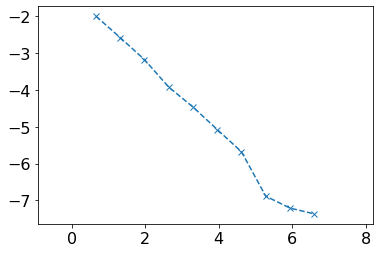

In [128]:
H, limits = np.histogramdd(eta, bins=10)
H_all, limits = np.histogramdd(eps_cropped, bins=limits)
plt.plot(limits[0][1:], np.log(H / H_all), 'x--')
plt.axis('equal')
plt.show()

In [111]:
limits[0][1:]

array([ 11.824662  ,  23.64667509,  35.46868817,  47.29070125,
        59.11271434,  70.93472742,  82.7567405 ,  94.57875359,
       106.40076667, 118.22277976])